In [2]:
import pandas as pd
import numpy as np

from sklearn import tree
df=pd.read_csv("Documents/PastHires.csv",header=0)
df.head()

Years Experience Employed?  Previous employers Level of Education  \
0                10         Y                   4                 BS   
1                 0         N                   0                 BS   
2                 7         N                   6                 BS   
3                 2         Y                   1                 MS   
4                20         N                   2                PhD   

  Top-tier school Interned Hired  
0               N        N     Y  
1               Y        Y     Y  
2               N        N     N  
3               Y        N     Y  
4               Y        N     N

In [3]:
#Assigning x and y
df1={'Y':1,'N':0}
df['Employed?']=df['Employed?'].map(df1)
df['Top-tier school']=df['Top-tier school'].map(df1)
df['Interned']=df['Interned'].map(df1)
df['Hired']=df['Hired'].map(df1)
df2={'BS':0,'MS':1,'PhD':2}
df['Level of Education']=df['Level of Education'].map(df2)
df

Years Experience  Employed?  Previous employers  Level of Education  \
0                 10          1                   4                   0   
1                  0          0                   0                   0   
2                  7          0                   6                   0   
3                  2          1                   1                   1   
4                 20          0                   2                   2   
5                  0          0                   0                   2   
6                  5          1                   2                   1   
7                  3          0                   1                   0   
8                 15          1                   5                   0   
9                  0          0                   0                   0   
10                 1          0                   1                   2   
11                 4          1                   1                   0   
12                 0          0                   0                   2   

    Top-tier school  Interned  Hired  
0                 0         0      1  
1                 1         1      1  
2                 0         0      0  
3                 1         0      1  
4                 1         0      0  
5                 1         1      1  
6                 0         1      1  
7                 0         1      1  
8                 0         0      1  
9                 0         0      0  
10                1         0      0  
11                0         1      1  
12                1         0      1

In [4]:
feature=list(df.columns[:6])
feature

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [5]:
#using decision tree on x ,y
#formin decision tree having nodes increasing imformation gain or decreasing gini index
y = df["Hired"]
X = df[feature]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

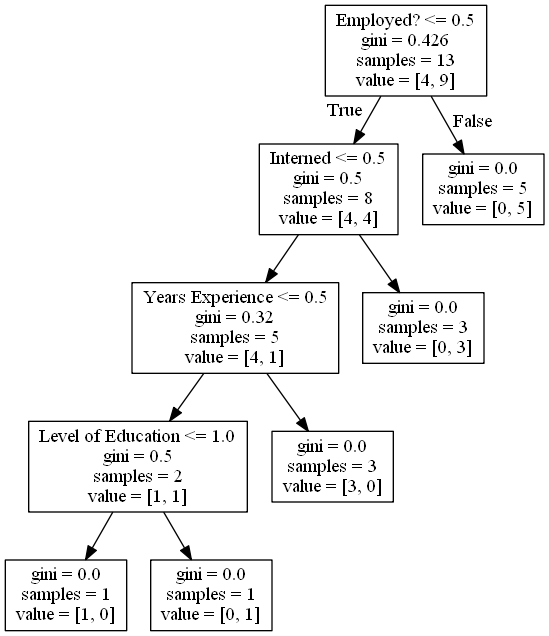

In [6]:
#graphical representation of decision tree
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, y)

#Predict employment of an employed 10-year veteran
print (clf.predict([[0, 0, 0, 1, 1, 0]]))
#...and an unemployed 10-year veteran
print (clf.predict([[0, 0, 0, 1, 1, 1]]))

[1]
[1]
